In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def rayleigh_noise(oldimg, a, b):
    if len(oldimg.shape) == 3 and oldimg.shape[2] == 3:
        is_rgb = True
        R, C, _ = oldimg.shape
        newimg = np.zeros_like(oldimg)
    else:
        is_rgb = False
        R, C = oldimg.shape
        newimg = np.zeros((R, C))
    
    for i in range(1, 256):
        number_of_pixel = round((2 / b) * (i - a) * (np.exp((-(i - a) * (i - a)) / b) * R * C))
        for j in range(number_of_pixel):
            row = np.random.randint(0, R)
            column = np.random.randint(0, C)
            if is_rgb:
                for y in range(3):
                    newimg[row, column, y] = oldimg[row, column, y] + i
            else:
                newimg[row, column] = oldimg[row, column] + i
    
    if is_rgb:
        # Contrast stretching
        for i in range(3):
            mn = np.min(newimg[:, :, i])
            mx = np.max(newimg[:, :, i])
            newimg[:, :, i] = ((newimg[:, :, i] - mn) / (mx - mn)) * 255
    
    return newimg

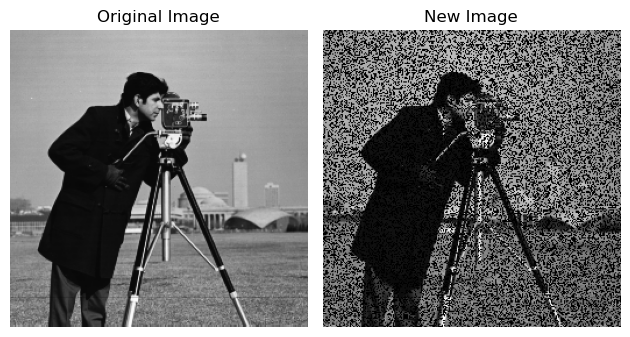

In [10]:
#Read the image
image = cv2.imread('cameraman.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Specify the parameter
a=0.1
b=5

# Apply rayleigh_noise function
newImage = rayleigh_noise(gray_image, a, b)

# Display the original image and new image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')
plt.title('New Image')
plt.axis('off')

plt.tight_layout()
plt.show()